# ****MORPHOLOGICAL PROCESSING****


#### Clàudia Blasco (1709871)
#### Laura Buide (1710559)
#### Carla Cruz (1703329)
#### Laia Espluga (1710510)
#### Lucía Rodríguez (1705385).

## **1. Introduction**
Morphological processing is a fundamental technique in computer vision that analyzes and manipulates the structure of objects within an image. Based on set theory, it is primarily applied to **binary images** but can also be extended to **grayscale images**. Through operations such as **erosion, dilation, opening, and closing**, morphological processing enables **shape extraction, noise reduction, edge detection, and object segmentation**, making it essential in fields like **medicine, industry, and security**. This project aims to explore these concepts, demonstrating their applications and impact on image analysis.

## **2. Mathematical Foundations of Morphological Processing**

### 1. Set Theory: Understanding Sets in a Discrete Space
Morphological image processing is fundamentally based on **set theory**, where objects in a **binary image** are treated as sets of points in a **discrete space** (typically a 2D grid).  
- A **binary image** consists of pixels with values **1 (foreground, object)** and **0 (background)**.  
- The object in an image is represented as a **set of foreground pixels**, while the background is treated as the **complementary set**.  

For example, an image \( A \) containing an object can be represented as:  


$$ A = \{(x,y) \mid f(x,y) = 1\} $$


where \( f(x,y) \) is the pixel value at coordinates \( (x,y) \).  

In morphological operations, these **sets of pixels** are manipulated using **structuring elements** to **modify shapes, extract features, or remove noise**.



### 2. Structuring Elements: Definition and Interaction with the Image  
A **structuring element (SE)** is a small matrix (or kernel) that interacts with an image to **probe** and **modify** its structure.  
- It is defined as a **binary set of pixels** (typically a small square, cross, or circle).  
- The **origin (center)** of the structuring element determines how it overlaps with the image pixels.  

Mathematically, if \( B \) is a structuring element, it is defined as:  

$$ B = \{(x,y) \mid b(x,y) = 1\}$$

where \( b(x,y) \) represents the pixel values of the structuring element.

#### *How the Structuring Element Interacts with an Image*  
- It is **placed over each pixel of the image**, aligning its center with the pixel.  
- Depending on the operation (erosion, dilation, etc.), the interaction between the structuring element and the underlying pixels **modifies the image**.  

For example, a **3×3 cross-shaped structuring element**:


$$ B =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$

This structuring element is commonly used for morphological operations like **dilation** and **erosion**.

### 3. Basic Set Operations in Morphological Processing  
Morphological processing uses fundamental **set operations** to manipulate images:

#### 3.1 Intersection (A ∩ B)  
- Finds **common pixels** between two sets (or binary images).  
- In morphological processing, intersection can be used to **detect overlapping objects**.  

Mathematically:

$$ A \cap B = \{(x,y) \mid (x,y) \in A \text{ and } (x,y) \in B\} $$

#### 3.2 Union (A ∪ B)  
- Combines pixels from both sets, **merging objects** in an image.  
- Used in **image fusion or combining binary masks**.  

Mathematically:

$$ A \cup B = \{(x,y) \mid (x,y) \in A \text{ or } (x,y) \in B\}$$

#### 3.3 Complement (¬A)  
- **Inverts the image** by flipping foreground and background.  
- Used to **highlight objects against the background** or **prepare images for further processing**.  

Mathematically:

$$ \neg A = \{(x,y) \mid (x,y) \notin A\}$$

### Application of These Operations in Morphology  
This **mathematical foundation** forms the basis for morphological operations like **erosion, dilation, opening, and closing**, which are essential for **shape analysis, noise removal, and feature extraction** in image processing. 


Here’s a Python code that demonstrates the mathematical applications for morphological image processing. This code applies fundamental morphological operations—erosion, dilation, and complementation—on a binary image, using a structuring element (kernel) to probe and modify the image’s structure.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dilation import dilation_manual

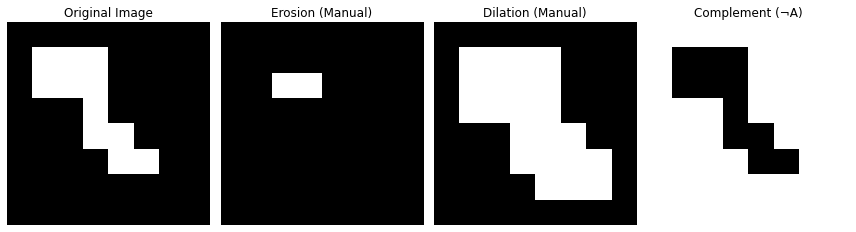

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to apply manual erosion
def erosion_manual(image, struct_elem):
    h, w = image.shape
    sh, sw = struct_elem.shape
    pad_h, pad_w = sh // 2, sw // 2

    # Convert image to binary if it contains values in the range 0-255
    if np.max(image) == 255:
        image = image // 255  # Convert image to binary values (0 or 1)

    # Apply padding to the original image
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    eroded_image = np.zeros_like(image)

    # Apply erosion by scanning the image
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            
            # Check if all pixels corresponding to 1s in struct_elem are also 1 in the image
            if np.all(region[struct_elem == 1] == 1):  
                eroded_image[i, j] = 1  # Retain pixel only if it matches the structuring element

    return eroded_image

def dilatacion_manual(image, struct_elem):
    h, w = image.shape
    sh, sw = struct_elem.shape
    pad_h, pad_w = sh // 2, sw // 2

    # Convertimos la imagen a binaria si está en 0-255 (para que sea binaria en 0-1)
    if np.max(image) == 255:
        image = image // 255  # Convertir la imagen a valores binarios 0 o 1

    # Imagen con padding
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    dilated_image = np.zeros_like(image)

    # Aplicar dilatación
    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+sh, j:j+sw]
            # Si al menos un píxel de la región es 1 en el structuring element
            if np.any(region[struct_elem == 1] == 1):  
                dilated_image[i, j] = 1

    return dilated_image


# Create a test binary image
image = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
])

# Define a small structuring element
structuring_element = np.array([
    [1, 1],
    [1, 1]
])

# Apply manual erosion and dilation
eroded_image = erosion_manual(image, structuring_element)
dilated_image = dilation_manual(image, structuring_element)

# Compute the complement of the image
complement_image = np.logical_not(image).astype(int)

# Display images
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Erosion (Manual)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilation (Manual)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(complement_image, cmap='gray')
plt.title('Complement (¬A)')
plt.axis('off')

plt.tight_layout()
plt.show()


#### Explanation of the Code:
- **Original Image**: A 7x7 binary image with some foreground objects (1's) and background (0's).
- **Structuring Element**: A 3x3 cross-shaped structuring element used for morphological operations.
- **Erosion**: The operation of intersection between the image and the structuring element. Only pixels fully surrounded by the structuring element (1's) remain in the image.
- **Dilation**: The operation of union between the image and the structuring element. Pixels are added to the image where the structuring element overlaps.
- **Complement**: Inverts the image, changing foreground pixels (1's) to background pixels (0's) and vice versa.

#### How it connects to the mathematical applications:
- The **erosion** operation is equivalent to the intersection $(A \cap B)$, which removes pixels from the boundary of the foreground.
- The **dilation** operation is equivalent to the union $(A \cup B)$, which adds pixels to the boundary of the foreground.
- The **complement** operation inverts the image $( \neg A)$, flipping the 1's and 0's.

Running this code in a Jupyter notebook will display the original image and the results of the morphological operations, visually demonstrating the mathematical concepts of intersection, union, and complement.

## **3. Basic Morphological Operations**

Morphological processing is a technique used in image processing to modify and analyze shapes in an image. It works mainly with binary images (black-and-white images) and uses a structuring element, which is a small shape that interacts with objects in the image. 

The four basic operations are Erosion, Dilation, Opening, and Closing.

### 1. Erosion: Making Objects Smaller

Erosion is a process that shrinks (become or make smaller in size or amount) objects in an image. It works by removing pixels from the edges of objects based on the structuring element. If the structuring element does not fully fit inside the object, that part of the object disappears.

**Uses of Erosion**:
- Removes small details or noise from an image.
- Separates objects that are touching.
- Makes objects look thinner.

**Example**: If you apply erosion to a text image, the letters will become thinner.

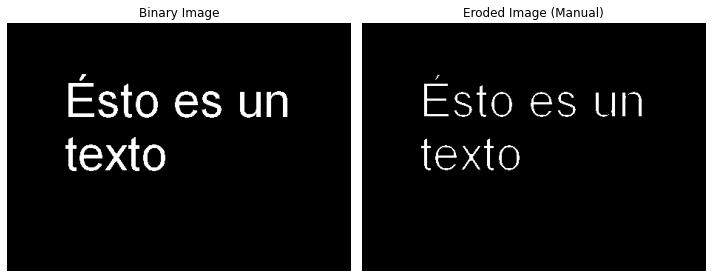

In [3]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to binary (black background, white text)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for the erosión
kernel = np.ones((3, 3), np.uint8)

# Apply manual erosion
eroded_image = erosion_manual(binary, kernel)

# Show the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title("Eroded Image (Manual)")
plt.axis("off")

plt.tight_layout()
plt.show()

### 2. Dilation: Making Objects Bigger
Dilation is the opposite of erosion. Instead of removing pixels, it adds pixels to the edges of objects, making them larger. If any part of the structuring element touches the object, the object grows in size.

**Uses of Dilation**:
- Fills small holes inside objects.
- Connects broken parts of an object.
- Makes objects thicker.

**Example**: If you apply dilation to a broken line, the gaps will be filled, making it a complete line. In this case the line it's not broken, so it becomes thicker.



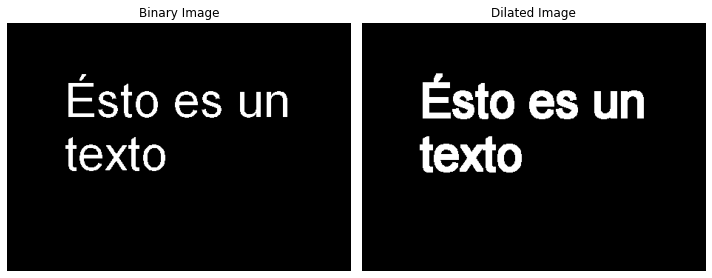

In [4]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for dilation
kernel = np.ones((4, 4), np.uint8)  # Kernel size 4x4

# Apply dilation
dilated = dilatacion_manual(binary, kernel)

# Display the original and dilated images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### 3. Opening: Removing Small Objects
Opening is a combination of erosion followed by dilation.

First, erosion removes small objects (such as noise).
Then, dilation restores the main shapes of the image.

**Uses of Opening**:
- Removes random small white dots (noise).
- Helps smooth object boundaries.
- Keeps important parts of the image while removing unwanted details.

**Example**: If an image has small white specks (like dust on a black background), opening can remove them.

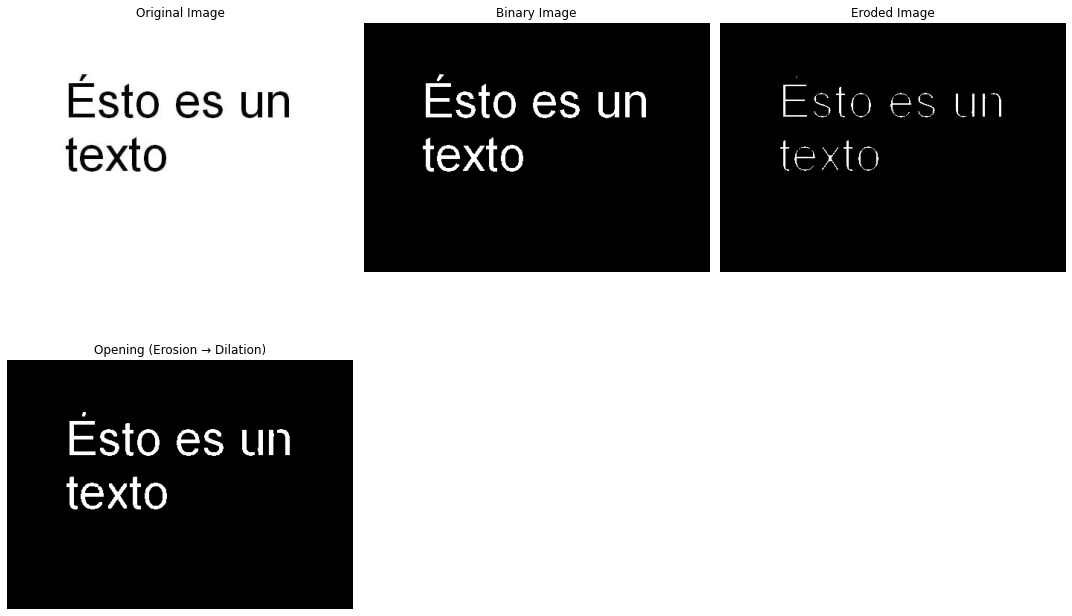

In [19]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Check the correct loading of the image
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel
kernel = np.ones((4, 4), np.uint8)

# Opening
def opening(binary_image, kernel):
    # Manual erosion
    eroded_image = erosion_manual(binary_image, kernel)
    # Manual dilation
    dilated_image = dilatacion_manual(eroded_image, kernel)
    return eroded_image, dilated_image

eroded_image, dilated_image = opening(binary, kernel)

# Show all the images 
titles = ["Original Image", "Binary Image", "Eroded Image", "Opening (Erosion → Dilation)"]
images = [image, binary, eroded_image, dilated_image]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


### 4. Closing: Filling Small Gaps
Closing is the opposite of opening. It is a dilation followed by erosion.

First, dilation expands the objects, filling small holes and gaps.
Then, erosion restores the original shape without bringing back the gaps.

**Uses of Closing**:
- Fills small holes in an image.
- Connects objects that are close together.
- Makes object boundaries smoother.

**Example**: If an object has tiny black holes inside, closing will fill them up, making the object solid.

In [ ]:
# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Verify if the image loaded correctly
if image is None:
    raise FileNotFoundError("⚠️ Image not found. Check the filename and path.")

# Convert to binary (Thresholding)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define a structuring element (kernel)
kernel = np.ones((5,5), np.uint8)  

# Apply dilation
dilated_image = dilatacion_manual(binary, kernel)

# Apply erosion
eroded_image = erosion_manual(dilated_image, kernel)

# Display the original and processed images
titles = ["Binary Image", "Dilated_image","Closing (Dilation → Erosion)"]
images = [binary, dilated_image, eroded_image]

plt.figure(figsize=(10, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

## **4. Advanced Morphological Operations**
Advanced morphological operations extend basic transformations like erosion and dilation to more complex image processing tasks. These operations are widely used in computer vision, medical imaging, and pattern recognition. 

The main advanced operations include Morphological Gradient, Top-Hat/Black-Hat and Skeletonization.

### 1. Morphological Gradient

Morphological Gradient is a process that highlights the edges of objects by subtracting the eroded version of an image from the dilated version.

**How Does the Kernel Affect This?**
The kernel (np.ones((3,3), np.uint8)) defines the neighborhood for dilation and erosion:

    Larger kernel → Thicker edges.
    Smaller kernel → Finer edges.

**Uses of Morphological Gradient**:
- Edge detection
- Object boundary enhancement

**Example**: If you apply this process to a text image, it will extract the edges.

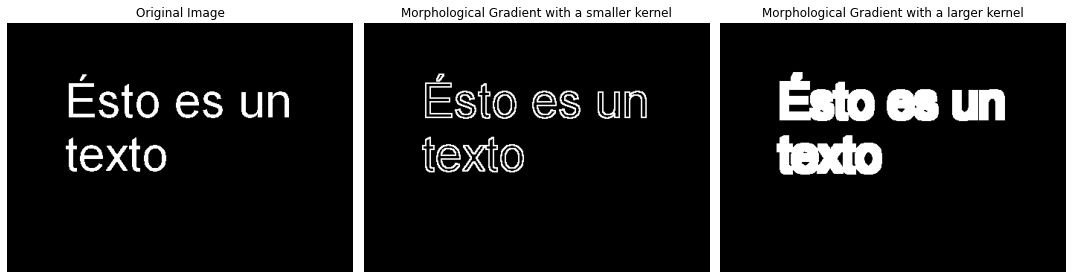

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image (ensure background is black and text is white)
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Define the kernel for morphological operations
small_kernel = np.ones((3, 3), np.uint8)
large_kernel = np.ones((8, 8), np.uint8)

# Define manual erosion and dilation functions
def erosion_manual(img, kernel):
    return cv2.erode(img, kernel, iterations=1)

def dilatacion_manual(img, kernel):
    return cv2.dilate(img, kernel, iterations=1)

# Calculate the morphological gradient
def gradient(binary_image, kernel):
    dilated_image = dilatacion_manual(binary_image, kernel)
    eroded_image = erosion_manual(binary_image, kernel)
    return dilated_image - eroded_image  # Gradient = Dilation - Erosion

# Compute gradients with different kernels
fine_gradient = gradient(binary, small_kernel)
thick_gradient = gradient(binary, large_kernel)

# Display the original and gradient images
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title("Original Image")
plt.axis("off")

# Display gradient image with small kernel
plt.subplot(1, 3, 2)
plt.imshow(fine_gradient, cmap='gray')
plt.title("Morphological Gradient with a smaller kernel")
plt.axis("off")

# Display gradient image with large kernel
plt.subplot(1, 3, 3)
plt.imshow(thick_gradient, cmap='gray')
plt.title("Morphological Gradient with a larger kernel")
plt.axis("off")

plt.tight_layout()
plt.show()


### 2. Skeletonization

This process reduces objects to their thin, connected centerlines, preserving topology.

**Uses of Skeletonization**:
- Reducing text to its centerlines.
- Character recognition and feature extraction.

**Example**: If you apply this process to a text image, it will thin the letters to their minimal representation while preserving connectivity.

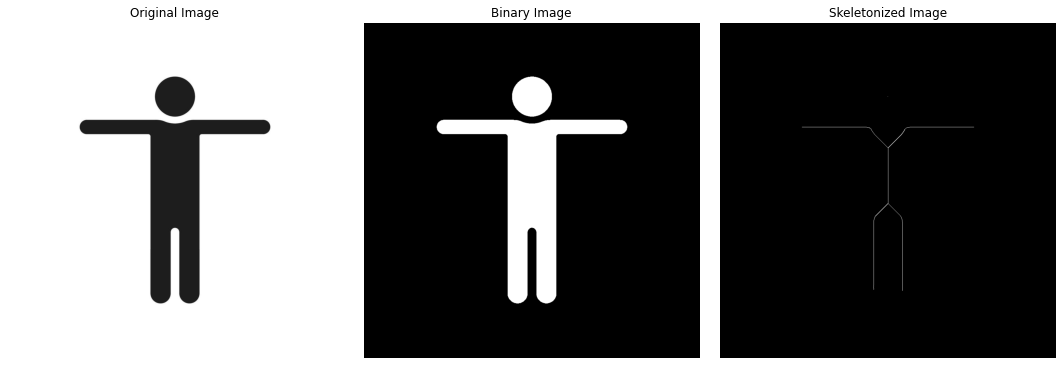

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def get_neighbors(image):
    """Gets the 8 neighbors of each pixel in the image using np.roll."""
    shifts = [(-1, 0), (-1, 1), (0, 1), (1, 1), 
              (1, 0), (1, -1), (0, -1), (-1, -1)]
    return [np.roll(image, shift, axis=(0, 1)) for shift in shifts]

def transitions(neighbors):
    """Calculates the number of 0→1 transitions in the sequence of neighbors."""
    return sum((neighbors[i] == 0) & (neighbors[i+1] == 1) for i in range(7)) + ((neighbors[7] == 0) & (neighbors[0] == 1))

def zhang_suen_thinning(image):
    """Zhang-Suen thinning algorithm optimized with NumPy."""
    image = image.astype(np.uint8)
    changing = True
    while changing:
        changing = False
        for step in [((0, 2, 4), (2, 4, 6)), ((0, 2, 6), (0, 4, 6))]:  
            neighbors = get_neighbors(image)
            sum_neighbors = sum(neighbors)
            condition1 = (image == 1) & (sum_neighbors >= 2) & (sum_neighbors <= 6)
            condition2 = transitions(neighbors) == 1
            condition3 = neighbors[step[0][0]] * neighbors[step[0][1]] * neighbors[step[0][2]] == 0
            condition4 = neighbors[step[1][0]] * neighbors[step[1][1]] * neighbors[step[1][2]] == 0
            delete_mask = condition1 & condition2 & condition3 & condition4
            if np.any(delete_mask):
                changing = True
                image[delete_mask] = 0
    return image

def skeletonize(image):
    """Converts the binary image into its skeleton using Zhang-Suen."""
    return zhang_suen_thinning(image > 0)

# Load the image
image_path = "human.jpg"
original_image = Image.open(image_path).convert('L')
binary_image = (np.array(original_image) < 128).astype(np.uint8)

# Skeletonization
skeleton = skeletonize(binary_image)

# Show results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ['Original Image', 'Binary Image', 'Skeletonized Image']
images = [original_image, binary_image, skeleton]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


### 3. Watershed Segmentation

This process is a powerful image processing technique used for separating overlapping or touching objects in an image. It is based on the concept of topography, where an image is treated as a 3D surface with peaks (bright arear) and valleys (dark areas). The watershed algorithm floods the valleys and progressively fills them until boundaries between objects are detected.

**Uses of Watershed Segmentation**:
- Medical Imaging: Used for segmenting organs, tumors, and cells in radiological scans and microscopic images.

- Object Detection: Helps in separating touching objects in images, such as coins, cells, or grains.

- Document Analysis: Useful for segmenting overlapping text or symbols.

**Example**: 

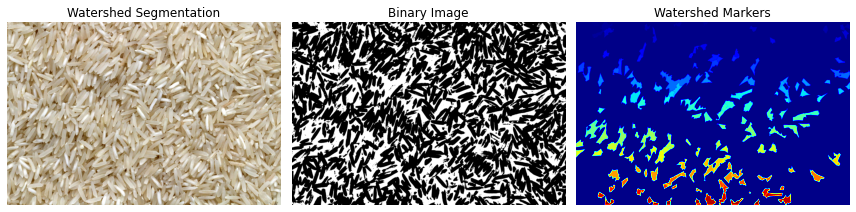

In [22]:
# Load the image
image_path = 'rice.jpeg'
image = cv2.imread(image_path)

# Check if image is loaded
if image is None:
    raise FileNotFoundError(f"Could not load image at {image_path}")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Convert to binary using thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove small noise using morphological opening
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area using dilation
sure_bg = cv2.dilate(cleaned, kernel, iterations=3)

# Compute the Distance Transform to get sure foreground
dist_transform = cv2.distanceTransform(cleaned, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)  # Adjust threshold

# Convert sure foreground to uint8
sure_fg = np.uint8(sure_fg)

# Identify unknown region (possible object boundaries)
unknown = cv2.subtract(sure_bg, sure_fg)

# Label markers for watershed (connected components)
num_labels, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so background is not 0
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply Watershed algorithm
markers = cv2.watershed(image, markers)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(markers, cmap='jet')
plt.title("Watershed Markers")
plt.axis("off")

plt.tight_layout()
plt.show()



## **Challenge**  

After reading the explanation on basic morphological operations, using the image **test.jpg**, you must implement the **erosion transformation**.


In [1]:
#Implement your code here
